# Importing libraries

In [24]:
%matplotlib inline


import pandas as pd # package for high-performance, easy-to-use data structures and data analysis
import numpy as np # fundamental package for scientific computing with Python
import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()

# import cufflinks and offline mode
import cufflinks as cf
cf.go_offline()

from plotly import tools

from sklearn import preprocessing
# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

# Print all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [70]:
bug_data = pd.read_csv('eda.csv')

# Overview of data

In [71]:
print('size of bug data', bug_data.shape)

size of bug data (192068, 168)


So below Analysis will be based on 192068 records

In [72]:
bug_data.head()

,WEEK_END_DATE,IDENTIFIER,DE_MANAGER_USERID,SEVERITY_CODE,LIFECYCLE_STATE_CODE,FOUND_PHASE_CODE,REGRESSION_BUG_FLAG_OLD,SUBMITTED_DATE,PROJECT,PRODUCT,COMPONENT,ENGINEER,SUBMITTER_ID,RESOLVED_ON,PRIORITY_DESC,PRIORITY_CODE,FEATURE,RELEASE_NOTE,SA_ATTACHMENT_TYPE,CR_ATTACHMENT_TYPE,UT_ATTACHMENT_TYPE,SA_ATTACHMENT_INDIC,CR_ATTACHMENT_INDIC,UT_ATTACHMENT_INDIC,CATEGORY,IMPACT,BADCODEFIXID,CLOSED_ON,ORIGIN,ORIGINAL_FOUND,OPENED_ON,HEADLINE,IS_CUSTOMER_VISIBLE,DUPLICATE_OF,DUPLICATE_ON,NOT_CUSTOMER_VISIBLE_REASON,VERSION_TEXT,TICKETS_COUNT,ATTRIBUTE,INCOMING_INDIC,BACKLOG_INDIC,DISPOSED_INDIC,SEV1_INDIC,SEV2_INDIC,SEV3_INDIC,SEV4_INDIC,SEV5_INDIC,SEV6_INDIC,TS_INDIC,SS_INDIC,OIB_INDIC,STATE_ASSIGN_INDIC,STATE_CLOSE_INDIC,STATE_DUPLICATE_INDIC,STATE_FORWARD_INDIC,STATE_HELD_INDIC,STATE_INFO_INDIC,STATE_JUNK_INDIC,STATE_MORE_INDIC,STATE_NEW_INDIC,STATE_OPEN_INDIC,STATE_POSTPONE_INDIC,STATE_QA_INDIC,STATE_RESOLVE_INDIC,STATE_SUBMIT_INDIC,STATE_UNREP_INDIC,STATE_VERIFY_INDIC,STATE_WAIT_INDIC,PRIORITY1_INDIC,PRIORITY2_INDIC,PRIORITY3_INDIC,PRIORITY4_INDIC,PRIORITY5_INDIC,PRIORITY6_INDIC,PRIORITY7_INDIC,PRIORITY8_INDIC,PRIORITY9_INDIC,CFD_INDIC,IFD_INDIC,CFR_INDIC,SS_EVAL_INDIC,SP12_INDIC,MTTR,S3P12_INDIC,RD_INDIC,INVALID_SS_INDIC,POTENTIAL_SS_INDIC,S12RD_INDIC,S12CFD_INDIC,S123RD_INDIC,MISSING_SS_EVAL_INDIC,S123_INDIC,S12_INDIC,CREATED_IN_LAST_14D_INDIC,SS_EVAL_TEXT,RETI_ANALYSIS,EDP_ANALYSIS,RESOLVER_ANALYSIS,SUBMITTER_ANALYSIS,DEV_ESCAPE,TEST_ESCAPE,RNE_INDIC,CREATED_BY,CREATED_ON,UPDATED_BY,UPDATED_ON,ASSIGNED_ON,FORWARDED_ON,HELD_ON,INFO_REQ_ON,JUNKED_ON,NEW_ON,POSTPONED_ON,UNREPRODUCIBLE,VERIFIED_ON,WAITING_ON,MORE_ON,LAST_MOD_ON,S123CFD_INDIC,FIRST_CLOSED_ON,BUG_ORIGIN,DETAILED_ACTIVITY,DEV_ESCAPE_ACTIVITY,FOUND_DURING,ORIGINAL_FOUND_DURING,RELEASED_CODE,RELEASED_CODE_ID,TEST_EDP_ACTIVITY,TEST_EDP_COMMENTS,TEST_EDP_PHASE,ACTIVITY_WHEN_FOUND,RESOLVER_ANALYSIS_INDIC,SUBMITTER_ANALYSIS_INDIC,EDP_ANALYSIS_INDIC,RETI_ANALYSIS_INDIC,DESIGN_REVIEW_ESCAPE_INDIC,STATIC_ANALYSIS_ESCAPE_INDIC,FUNC_TEST_ESCAPE_INDIC,SELECT_REG_ESCAPE_INDIC,CODE_REVIEW_ESCAPE_INDIC,UNIT_TEST_ESCAPE_INDIC,DEV_ESCAPE_INDIC,FEATURE_TEST_ESCAPE_INDIC,REG_TEST_ESCAPE_INDIC,SYSTEM_TEST_ESCAPE_INDIC,SOLUTION_TEST_ESCAPE_INDIC,INT_TEST_ESCAPE_INDIC,GO_TEST_ESCAPE_INDIC,IFD_CFD_INDIC,COMPLETE_ESCAPE_INDIC,SR_CNT,PSIRT_INDIC,BADCODEFIX,BADCODEFLAG,SR_NUMBERS,RISK_SCORE,NORMALIZED_RISK_SCORE,RISK_LEVEL,RISK_OWNER,SIR,PSIRT_FLAG,URC_DISPOSED_INDIC,CLOSED_DISPOSED_INDIC,REGRESSION_BUG_FLAG,IFD_CFD_INDIC_DATE,csap_last_run_date,csap_last_updated_date,AGE
0,2018-04-28T00:00:00.000Z,CSCzv63410,sreeshen,2,R,func-test,NaN,2013-03-06T04:15:12.000Z,CSC.content-security,wsa,wui_other,sadhamot,ahrytski,2016-09-09T00:16:29.000Z,NaN,NaN,feature,ignore,NaN,NaN,NaN,1,1,1,error handling,dont-pick/reg,NaN,NaN,design,NaN,2016-09-09T00:16:29.000Z,NaN,N,NaN,NaN,NaN,7.5.2(MatterhornMaintRls)-000 7.7.5(Penglai)-0...,0,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,ETL_USER,2016-11-14T00:46:48.000Z,2016-08-25T02:48:03.000Z,NaN,NaN,NaN,NaN,2013-03-18T18:37:47.000Z,2013-08-01T09:11:36.000Z,NaN,NaN,NaN,2016-09-09T00:16:29.000Z,2016-11-12T12:49:50.000Z,0,2016-09-09T00:16:29.000Z,NaN,NaN,Not-A-Dev-Escape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2458230,1,NaN,N,NaN,NaN,NaN,NaN,sadhamot,Medium,Y,0,0,N,NaN,2018-04-25T20:53:05.000Z,2018-04-25T20:53:06.000Z,1283
1,2018-04-28T00:00:00.000Z,CSCzv63416,gpayten,3,R,func-test,NaN,2010-08-30T18:31:18.000Z,CSC.content-security,awesome,portal,gpayten,gpayten,2010-08-30T18:31:18.000Z,NaN,NaN,feature,ignore,NaN,NaN,NaN,1,1,1,algorithm/logic,dont-pick/reg,NaN,NaN,bad codefix,NaN,2010-08-30T18:31:18.000Z,NaN,N,NaN,NaN,NaN,1.5-000,0,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,Na

## Checking for missing data

In [73]:
bug_data['ASSIGNED_ON'] = bug_data['ASSIGNED_ON'].map({'nan' : 'NaN'})

In [76]:
# checking missing data in bug data 
total = bug_data.isnull().sum().sort_values(ascending = False)
percent = (bug_data.isnull().sum()/bug_data.isnull().count() * 100).sort_values(ascending = False)
missing_bug_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_bug_data.head(90)

,Total,Percent
S3P12_INDIC,192068,100.000000
HEADLINE,192068,100.000000
PRIORITY_CODE,192068,100.000000
RD_INDIC,192068,100.000000
INVALID_SS_INDIC,192068,100.000000
SA_ATTACHMENT_TYPE,192068,100.000000
CR_ATTACHMENT_TYPE,192068,100.000000
UT_ATTACHMENT_TYPE,192068,100.000000
POTENTIAL_SS_INDIC,192068,100.000000
NOT_CUSTOMER_VISIBLE_REASON,192068,100.000000


## Visualising missing data(Visualising only first 45 features for better clarity)

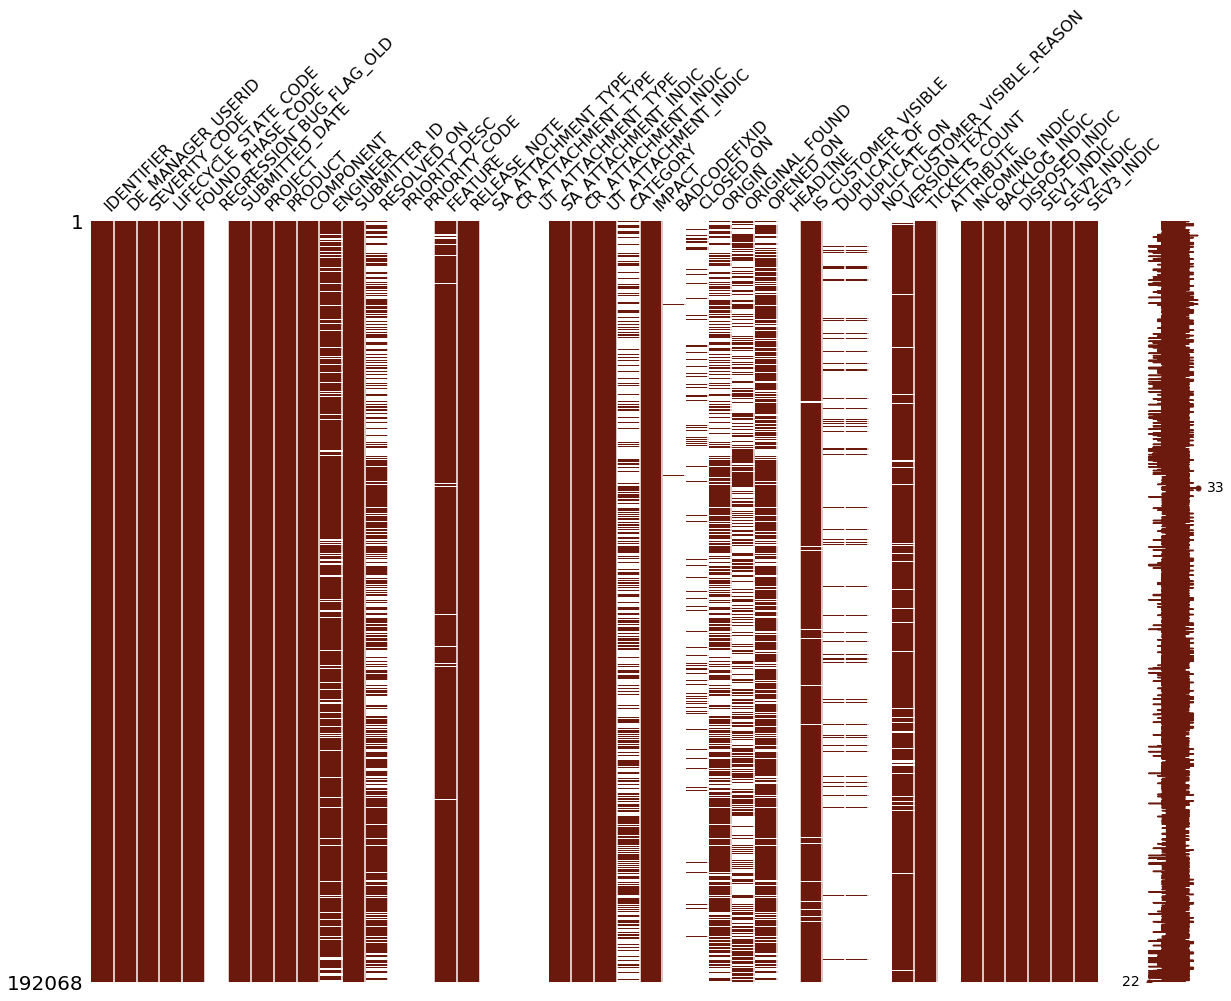

In [75]:
import missingno as msno
# Nullity or missing values by columns(Visualising only first 45 features for better clarity)
msno.matrix(df=bug_data.iloc[:,1:45], figsize=(20, 14), color=(0.42, 0.1, 0.05))

## The number of days between when a defect is submitted and when it enters its final terminal state, or the current date

In [1]:
x = bug_data['AGE']
data = [go.Histogram(x=x)]
iplot(data, filename='basic histogram')

NameError: name 'bug_data' is not defined

So, accordingly we can see that which type of bug taking more time to go to termination state. Like below bugs are taking more than 5000 days.

In [78]:
temp = bug_data[bug_data.AGE > 5000]
print('Number of bugs which are taking more than 5000 days : ', len(temp))
temp.head()

Number of bugs which are taking more than 5000 days :  123


,WEEK_END_DATE,IDENTIFIER,DE_MANAGER_USERID,SEVERITY_CODE,LIFECYCLE_STATE_CODE,FOUND_PHASE_CODE,REGRESSION_BUG_FLAG_OLD,SUBMITTED_DATE,PROJECT,PRODUCT,COMPONENT,ENGINEER,SUBMITTER_ID,RESOLVED_ON,PRIORITY_DESC,PRIORITY_CODE,FEATURE,RELEASE_NOTE,SA_ATTACHMENT_TYPE,CR_ATTACHMENT_TYPE,UT_ATTACHMENT_TYPE,SA_ATTACHMENT_INDIC,CR_ATTACHMENT_INDIC,UT_ATTACHMENT_INDIC,CATEGORY,IMPACT,BADCODEFIXID,CLOSED_ON,ORIGIN,ORIGINAL_FOUND,OPENED_ON,HEADLINE,IS_CUSTOMER_VISIBLE,DUPLICATE_OF,DUPLICATE_ON,NOT_CUSTOMER_VISIBLE_REASON,VERSION_TEXT,TICKETS_COUNT,ATTRIBUTE,INCOMING_INDIC,BACKLOG_INDIC,DISPOSED_INDIC,SEV1_INDIC,SEV2_INDIC,SEV3_INDIC,SEV4_INDIC,SEV5_INDIC,SEV6_INDIC,TS_INDIC,SS_INDIC,OIB_INDIC,STATE_ASSIGN_INDIC,STATE_CLOSE_INDIC,STATE_DUPLICATE_INDIC,STATE_FORWARD_INDIC,STATE_HELD_INDIC,STATE_INFO_INDIC,STATE_JUNK_INDIC,STATE_MORE_INDIC,STATE_NEW_INDIC,STATE_OPEN_INDIC,STATE_POSTPONE_INDIC,STATE_QA_INDIC,STATE_RESOLVE_INDIC,STATE_SUBMIT_INDIC,STATE_UNREP_INDIC,STATE_VERIFY_INDIC,STATE_WAIT_INDIC,PRIORITY1_INDIC,PRIORITY2_INDIC,PRIORITY3_INDIC,PRIORITY4_INDIC,PRIORITY5_INDIC,PRIORITY6_INDIC,PRIORITY7_INDIC,PRIORITY8_INDIC,PRIORITY9_INDIC,CFD_INDIC,IFD_INDIC,CFR_INDIC,SS_EVAL_INDIC,SP12_INDIC,MTTR,S3P12_INDIC,RD_INDIC,INVALID_SS_INDIC,POTENTIAL_SS_INDIC,S12RD_INDIC,S12CFD_INDIC,S123RD_INDIC,MISSING_SS_EVAL_INDIC,S123_INDIC,S12_INDIC,CREATED_IN_LAST_14D_INDIC,SS_EVAL_TEXT,RETI_ANALYSIS,EDP_ANALYSIS,RESOLVER_ANALYSIS,SUBMITTER_ANALYSIS,DEV_ESCAPE,TEST_ESCAPE,RNE_INDIC,CREATED_BY,CREATED_ON,UPDATED_BY,UPDATED_ON,ASSIGNED_ON,FORWARDED_ON,HELD_ON,INFO_REQ_ON,JUNKED_ON,NEW_ON,POSTPONED_ON,UNREPRODUCIBLE,VERIFIED_ON,WAITING_ON,MORE_ON,LAST_MOD_ON,S123CFD_INDIC,FIRST_CLOSED_ON,BUG_ORIGIN,DETAILED_ACTIVITY,DEV_ESCAPE_ACTIVITY,FOUND_DURING,ORIGINAL_FOUND_DURING,RELEASED_CODE,RELEASED_CODE_ID,TEST_EDP_ACTIVITY,TEST_EDP_COMMENTS,TEST_EDP_PHASE,ACTIVITY_WHEN_FOUND,RESOLVER_ANALYSIS_INDIC,SUBMITTER_ANALYSIS_INDIC,EDP_ANALYSIS_INDIC,RETI_ANALYSIS_INDIC,DESIGN_REVIEW_ESCAPE_INDIC,STATIC_ANALYSIS_ESCAPE_INDIC,FUNC_TEST_ESCAPE_INDIC,SELECT_REG_ESCAPE_INDIC,CODE_REVIEW_ESCAPE_INDIC,UNIT_TEST_ESCAPE_INDIC,DEV_ESCAPE_INDIC,FEATURE_TEST_ESCAPE_INDIC,REG_TEST_ESCAPE_INDIC,SYSTEM_TEST_ESCAPE_INDIC,SOLUTION_TEST_ESCAPE_INDIC,INT_TEST_ESCAPE_INDIC,GO_TEST_ESCAPE_INDIC,IFD_CFD_INDIC,COMPLETE_ESCAPE_INDIC,SR_CNT,PSIRT_INDIC,BADCODEFIX,BADCODEFLAG,SR_NUMBERS,RISK_SCORE,NORMALIZED_RISK_SCORE,RISK_LEVEL,RISK_OWNER,SIR,PSIRT_FLAG,URC_DISPOSED_INDIC,CLOSED_DISPOSED_INDIC,REGRESSION_BUG_FLAG,IFD_CFD_INDIC_DATE,csap_last_run_date,csap_last_updated_date,AGE
2126,2018-04-28T00:00:00.000Z,CSCzv03912,isarkiso,3,N,func-test,NaN,2003-12-03T17:11:38.000Z,CSC.content-security,testplanupdating,testplan,isarkiso,isarkiso,NaN,NaN,NaN,feature,ignore,NaN,NaN,NaN,0,0,0,NaN,dont-pick/reg,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,unspecified,0,NaN,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,ETL_USER,2016-08-10T02:45:21.000Z,NaN,NaN,NaN,NaN,NaN,2013-07-03T09:44:45.000Z,NaN,NaN,NaN,NaN,NaN,2015-04-07T05:05:15.000Z,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2458230,0,NaN,N,NaN,NaN,NaN,NaN,isarkiso,NaN,N,0,0,N,NaN,2018-04-25T20:53:05.000Z,2018-04-25T20:53:06.000Z,5256
2303,2018-04-28T00:00:00.000Z,CSCzv03327,isarkiso,3,N,func-test,NaN,2003-12-03T17:39:27.000Z,CSC.content-security,testplanupdating,testplan,isarkiso,isarkiso,NaN,NaN,NaN,feature,ignore,NaN,NaN,NaN,0,0,0,NaN,dont-pick/reg,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,unspecified,0,NaN,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,ETL_USER,2016-08-10T02:45:21.000Z,NaN,NaN,NaN,NaN,NaN,2013-07-03T18:21:44.000Z,NaN,NaN,NaN,NaN,NaN,2015-04-07T05:05:09.000Z,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,

## More Number of bugs found during which activity ?

In [100]:
# Displaying only Top 20 for better clearity
temp = bug_data["ACTIVITY_WHEN_FOUND"].value_counts().head(20)
temp.iplot(kind='bar', xTitle = 'Activity name', yTitle = "Count", title = 'Top Activities')

* **Top 5 Activities during more bugs were found :**
  * Feature / Functional Testing (**Mostly bug found during this**)
  * Cutomer-Use
  * Regression Tesing
  * Feature Interaction Testing
  * Unit Test

## Customer found defects

In [101]:
temp = bug_data['CFD_INDIC'].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values',title='Customer found defect(1) or Not(0)')

* As we can see out of all defects **13.9 %** defects are customer found defects.

## Number of bugs which were not caputured during Any Testing phase

In [81]:
temp = bug_data['COMPLETE_ESCAPE_INDIC'].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values',title='Num of bugs which were not caputured during Any Testing phase')

* Only 6.18 % bugs were not captured by any testing phase

## Top DE_Managers who are responsible for defects

In [103]:
# Displaying only Top 20 for better clearity
temp = bug_data["DE_MANAGER_USERID"].value_counts().head(20)
temp.iplot(kind='bar', xTitle = 'Manager ID', yTitle = "Count", title = 'Top DE_Managers who are responsible for defects')

* **Top 3 Managers IDs who responsible for defects are :**
  * mabhatta
  * schattop
  * erphilli

## Top Products with highest number of defetcs

In [104]:
# Displaying only Top 10 for better clearity
temp1 = bug_data.PROJECT.value_counts().head(10)
temp2 = bug_data.PRODUCT.value_counts().head(10)
temp = bug_data[bug_data['PRODUCT'] == 'esa']
#print(temp.head())
#temp2 = bug_data.PRODUCT.value_counts().head(10)
temp3 = temp.COMPONENT.value_counts().head(10)

trace1 = go.Bar(
    x=temp1.index,
    y=temp1.values
)

trace2 = go.Bar(
    x=temp2.index,
    y=temp2.values
)

trace3 = go.Bar(
    x=temp3.index,
    y=temp3.values
)
fig = tools.make_subplots(rows=1, cols=3, subplot_titles=('Top projects with highest number of defects',
                                                          'Top products with highest number of defects',
                                                          'Top components with highest number of defects'))
                                                          

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
                          
fig['layout']['xaxis1'].update(title='Product Name')
fig['layout']['xaxis2'].update(title='Project Name')
fig['layout']['xaxis3'].update(title='Component Name')

fig['layout']['yaxis1'].update(title='Count')
                          
fig['layout'].update(height=500, width=1100)
iplot(fig, filename='simple-subplot')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]



* All the data is of Only one product : **CSC.content-security**
* **Top 3 Products with highest number of defetcs in this product:**
  * esa
  * sfims
  * wsa
* In **'esa'** project Top Components with higher number of defects :
  * webui_all_pages
  * general
  * qurantine

## Features value of Bugs

In [85]:
temp = bug_data['FEATURE'].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values',title='Feature value of bugs')

## Top defects which were caught during Developement Activity

In [86]:
temp = bug_data['DEV_ESCAPE_ACTIVITY'].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values',title='Top defects which were caught during Developement Activity')

* 96 % defects were caught during Developement Activity.

## Number of duplicates bugs in the data

In [93]:
temp = bug_data['STATE_DUPLICATE_INDIC'].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values',title=' Number of duplicates bugs in the data(1)')

* Total 6.59 % (12,662) bugs are duplicate out of 1,92,068 bugs.

## Top Phases When Bug Found

In [108]:
# Displaying only Top 20 for better clearity
temp = bug_data["FOUND_PHASE_CODE"].value_counts().head(20)
temp.iplot(kind='bar', xTitle = 'Phase name', yTitle = "Count", title = 'Top Phases When Bug Found')

* **Top 5 Phase When Bug Found :**
  * func-test : bugs found 1,18,574 times 
  * customer-use : bugs found 26,746 times
  * developement : bugs found 11,707 times
  * regression : bugs found 8868 times
  * feature/functionality : bugs found 7993 times

## Different Types of defect Categories

In [125]:
temp = bug_data['CATEGORY'].value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, .48]},
      "name": "Defect Category",
      #"hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },
    
    ],
  "layout": {
        "title":"Different type of Defect categories",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Defect Categories",
                "x": 0.10,
                "y": 0.5
            }
            
        ]
    }
}
iplot(fig, filename='donut')

* **Top Defect Categories :**
  * algorirthm / logic : Occured 82.5 % time
  * function : Occured 14.3 % times

## Impact (Characterize the impact of the defect)

In [127]:
temp = bug_data['IMPACT'].value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, .48]},
      "name": "IMPACT of defect",
      #"hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },
    
    ],
  "layout": {
        "title":"Impacts of different Defects",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "IMPACT of defect",
                "x": 0.10,
                "y": 0.5
            }
            
        ]
    }
}
iplot(fig, filename='donut')